In [1]:
import numpy as np
import cv2
from iced import filter
from iced import normalization
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
from iced import normalization
from iced import filter
from scipy.stats import t
import os
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
data_names = ["MIT", "ALL", "RL", "call4"]

In [4]:
file_dir_template = "../data/extracted_all_contact_%s"
file_name_template = "%s/all_in_one_500kb.npy"%(file_dir_template)
print(file_dir_template)
print(file_name_template)

../data/extracted_all_contact_%s
../data/extracted_all_contact_%s/all_in_one_500kb.npy


In [6]:
data = {}
for key in data_names:
    data[key] = np.load(file_name_template%key)
    print("file for %s has been loaded"%key)

file for RL has been loaded
file for call4 has been loaded
file for ALL has been loaded
file for MIT has been loaded


In [7]:
lengths = {}
for key in data_names:
    lengths[key] = np.load("%s/lengths_500kb.npy"%(file_dir_template%key))

Number of rows and columns: 2, 2


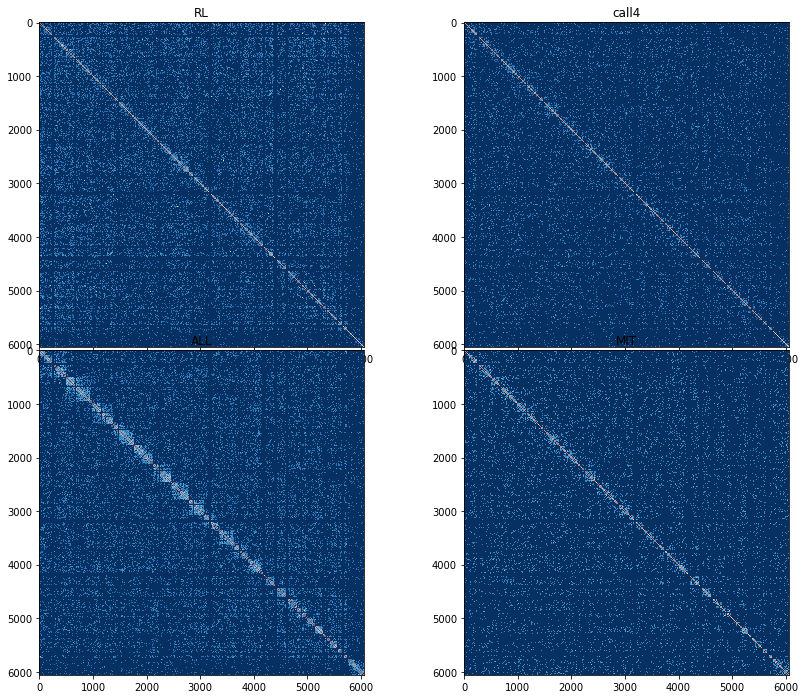

In [8]:
pylab.rcParams['figure.figsize'] = (15, 12)
showImages(data, 2)

In [10]:
normed = {}
for key in data_names:
    normed[key] = filter.filter_low_counts(data[key], lengths=lengths[key][:, 1], percentage=.04)
    normed[key] = normalization.ICE_normalization(normed[key])
    print("finished normalizing %s"%key)

finished normalizing RL
finished normalizing call4
finished normalizing ALL
finished normalizing MIT


Number of rows and columns: 2, 2


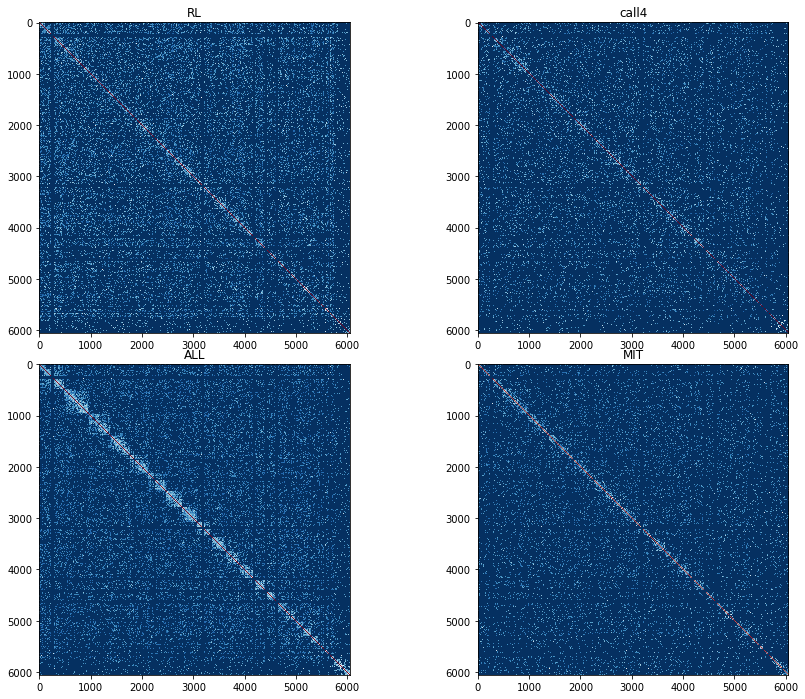

In [12]:
pylab.rcParams['figure.figsize'] = (15, 12)
showImages(normed, 2)

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 20)
k = (2, 2, 2, 2)
method = 'normal'
t = 0
params = None
symmetric=True
thresholded = {}
for name in data_names:
    thresholded[name] = local_threshold(normed[name], k=k, method=method\
                                       , t=t, params=params)
showImages(thresholded, 2) 

(2, 2, 2, 2)
(2, 2, 2, 2)


In [ ]:
for key in data_names:
    data[key] = np.save\
    ("%s/all_in_one_thresholded_500kb.npy"%(file_dir_template%key) , \
     thresholded[key].astype('uint8'))
    print("file for %s has been saved"%key)